In [2]:
import sys
sys.path.append("/Users/jkingslake/Documents/science/ApRES/xapres_package/xapres_package")
import ApRESDefs
!pip install sounddevice
!pip install soundfile
#import sounddevice as sd

  Using cached sounddevice-0.4.6-py3-none-macosx_10_6_x86_64.macosx_10_6_universal2.whl (107 kB)
  Using cached soundfile-0.12.1-py2.py3-none-macosx_10_9_x86_64.whl (1.2 MB)


In [3]:
import ApRESDefs as xa
ds = xa.load_zarr("A101")
ds

<xarray.Dataset>
Dimensions:          (attenuator_setting_pair: 2, time: 11723,
                      chirp_time: 40001, chirp_num: 20, profile_range: 6658)
Coordinates:
    AFGain           (attenuator_setting_pair) int64 dask.array<chunksize=(2,), meta=np.ndarray>
    attenuator       (attenuator_setting_pair) float64 dask.array<chunksize=(2,), meta=np.ndarray>
    burst_number     (time) int64 dask.array<chunksize=(1,), meta=np.ndarray>
  * chirp_num        (chirp_num) int64 0 1 2 3 4 5 6 7 ... 13 14 15 16 17 18 19
  * chirp_time       (chirp_time) timedelta64[ns] 00:00:00 ... 00:00:01
    filename         (time) <U83 dask.array<chunksize=(1,), meta=np.ndarray>
  * profile_range    (profile_range) float64 0.0 0.2103 ... 1.4e+03 1.4e+03
  * time             (time) datetime64[ns] 2022-05-22T19:40:20 ... 2022-09-25...
Dimensions without coordinates: attenuator_setting_pair
Data variables:
    battery_voltage  (time) float64 dask.array<chunksize=(20,), meta=np.ndarray>
    chirp            (time, chirp_time, chirp_num, attenuator_setting_pair) float64 dask.array<chunksize=(20, 40001, 20, 2), meta=np.ndarray>
    latitude         (time) float64 dask.array<chunksize=(20,), meta=np.ndarray>
    longitude        (time) float64 dask.array<chunksize=(20,), meta=np.ndarray>
    profile          (time, profile_range, chirp_num, attenuator_setting_pair) complex128 dask.array<chunksize=(20, 6658, 20, 2), meta=np.ndarray>
    profile_stacked  (time, profile_range, attenuator_setting_pair) complex128 dask.array<chunksize=(20, 6658, 2), meta=np.ndarray>
    temperature_1    (time) float64 dask.array<chunksize=(20,), meta=np.ndarray>
    temperature_2    (time) float64 dask.array<chunksize=(20,), meta=np.ndarray>

In [11]:
ds.chirp.isel(time=11000, chirp_num=0, attenuator_setting_pair=0).sonify(save = True)

In [10]:
!pwd

/Users/jkingslake/Documents/outreach/glaciology-intro-book/src/sections/radar/apres


In [67]:
import soundfile as sf
import numpy as np
import xarray as xr
import time
import sounddevice as sd

In [8]:
def load_zarr(site, directory = "gs://ldeo-glaciology/apres/greenland/2022/single_zarrs_noencode/"):
    """Load ApRES data stored in a zarr directory as an xarray and add functionality"""
    
    import numpy as np
    import xarray as xr
        
    ds = xr.open_dataset(directory + site,
        engine = 'zarr', 
        chunks = {}) 
    
    # add db function as new bound method of DataArrays
    xr.DataArray.db = lambda self : 20*np.log10(np.abs(self))
    
    
    # add sonfiy function (only if soundfile and sounddevice are instaled)
    def sonify(self, play = True, save = False, wav_filename = "chirp"):

    
        # make sure the input is just one chirp    
        if self.size != self.chirp_time.size: 
            raise BaseException('sonify only works for single chirps.')    

        #cut out the start and end to record popping
        chirp = self.isel(chirp_time =slice(5000,-500))


        if play:
            samplerate = chirp.chirp_time.size / (   (chirp.chirp_time[-1] - chirp.chirp_time[0]) /np.timedelta64(1, 's'))
            sd.play(chirp, samplerate = samplerate )

        if save:
            sf.write(F"{wav_filename} .wav", chirp, samplerate = samplerate)

 
    try:     
        import soundfile as sf
        import sounddevice as sd

        xr.DataArray.sonify = sonify 
    except ImportError:
        print("sounddevice and soundfile are required to sonify the chirps. pip install them if you need this feature") 
    
    
    return ds

ds = load_xapres('A104')

In [9]:
ds.chirp.sonify

AttributeError: 'DataArray' object has no attribute 'son'

In [3]:
ds.chirp.son

<xarray.Dataset>
Dimensions:          (attenuator_setting_pair: 2, time: 11741, chirp_time: 40001, chirp_num: 20, profile_range: 6658)
Coordinates:
    AFGain           (attenuator_setting_pair) int64 dask.array<chunksize=(2,), meta=np.ndarray>
    attenuator       (attenuator_setting_pair) float64 dask.array<chunksize=(2,), meta=np.ndarray>
    burst_number     (time) int64 dask.array<chunksize=(1,), meta=np.ndarray>
  * chirp_num        (chirp_num) int64 0 1 2 3 4 5 6 7 ... 13 14 15 16 17 18 19
  * chirp_time       (chirp_time) timedelta64[ns] 00:00:00 ... 00:00:01
    filename         (time) <U83 dask.array<chunksize=(1,), meta=np.ndarray>
  * profile_range    (profile_range) float64 0.0 0.2103 ... 1.4e+03 1.4e+03
  * time             (time) datetime64[ns] 2022-05-19T23:19:34 ... 2022-09-25...
Dimensions without coordinates: attenuator_setting_pair
Data variables:
    battery_voltage  (time) float64 dask.array<chunksize=(20,), meta=np.ndarray>
    chirp            (time, chirp_time, chirp_num, attenuator_setting_pair) float64 dask.array<chunksize=(20, 40001, 20, 2), meta=np.ndarray>
    latitude         (time) float64 dask.array<chunksize=(20,), meta=np.ndarray>
    longitude        (time) float64 dask.array<chunksize=(20,), meta=np.ndarray>
    profile          (time, profile_range, chirp_num, attenuator_setting_pair) complex128 dask.array<chunksize=(20, 6658, 20, 2), meta=np.ndarray>
    profile_stacked  (time, profile_range, attenuator_setting_pair) complex128 dask.array<chunksize=(20, 6658, 2), meta=np.ndarray>
    temperature_1    (time) float64 dask.array<chunksize=(20,), meta=np.ndarray>
    temperature_2    (time) float64 dask.array<chunksize=(20,), meta=np.ndarray>

In [9]:
sampling_frequency =  ds.chirp_time.size / (ds.chirp_time[-1]/np.timedelta64(1, 's'))   

In [15]:
waveform = ds.chirp.isel(time=300, chirp_num=0, attenuator_setting_pair=0)
sd.play(waveform, sampling_frequency)
waveform = ds.chirp.isel(time=300, chirp_num=1, attenuator_setting_pair=0)
sd.play(waveform, sampling_frequency, loop = True)
#time.sleep(1)


In [22]:
type(ds.chirp.isel(time=300, chirp_num=0, attenuator_setting_pair=0))

xarray.core.dataarray.DataArray

In [76]:
c

<xarray.DataArray 'chirp' (chirp_time: 40001)>
dask.array<getitem, shape=(40001,), dtype=float64, chunksize=(40001,), chunktype=numpy.ndarray>
Coordinates:
    AFGain        int64 dask.array<chunksize=(), meta=np.ndarray>
    attenuator    float64 dask.array<chunksize=(), meta=np.ndarray>
    burst_number  int64 dask.array<chunksize=(), meta=np.ndarray>
    chirp_num     int64 0
  * chirp_time    (chirp_time) timedelta64[ns] 00:00:00 ... 00:00:01
    filename      <U83 dask.array<chunksize=(), meta=np.ndarray>
    time          datetime64[ns] 2022-05-29T09:03:29
Attributes:
    description:  voltage from the analog-to-digital converter after the rece...
    long_name:    de-ramped chirp
    units:        volts

In [93]:
def sonify(self, play = True, save = False, wav_filename = "chirp"):
    # make sure the input is just one chirp    
    if self.size != self.chirp_time.size: 
        raise BaseException('sonify only works for single chirps.')    
    
    #cut out the start and end to record popping
    chirp = self.isel(chirp_time =slice(5000,-500))
    
    
    if play:
        samplerate = chirp.chirp_time.size / (   (chirp.chirp_time[-1] - chirp.chirp_time[0]) /np.timedelta64(1, 's'))
        sd.play(chirp, samplerate = samplerate )
    
    if save:
        sf.write(F"{wav_filename} .wav", chirp, samplerate = samplerate)
    
xr.DataArray.sonify = sonify 
ds.chirp.isel(time=300, chirp_num=0, attenuator_setting_pair=0).sonify(save = True)

In [83]:
c.isel(chirp_time =slice(1,-1))

<xarray.DataArray 'chirp' (chirp_time: 39999)>
dask.array<getitem, shape=(39999,), dtype=float64, chunksize=(39999,), chunktype=numpy.ndarray>
Coordinates:
    AFGain        int64 dask.array<chunksize=(), meta=np.ndarray>
    attenuator    float64 dask.array<chunksize=(), meta=np.ndarray>
    burst_number  int64 dask.array<chunksize=(), meta=np.ndarray>
    chirp_num     int64 0
  * chirp_time    (chirp_time) timedelta64[ns] 00:00:00.000025 ... 00:00:00.9...
    filename      <U83 dask.array<chunksize=(), meta=np.ndarray>
    time          datetime64[ns] 2022-05-29T09:03:29
Attributes:
    description:  voltage from the analog-to-digital converter after the rece...
    long_name:    de-ramped chirp
    units:        volts

In [71]:
ds.chirp.isel(time=300, chirp_num=0, attenuator_setting_pair=0).values

array([ 0.11154175,  0.00431061, -0.44773102, ..., -0.04142761,
        0.03463745,  0.96820831])

In [75]:
!pwd

/Users/jkingslake/Documents/outreach/glaciology-intro-book/src/sections/radar/apres


In [40]:
sd.play(ds.chirp.isel(time=300, chirp_num=0).values, 40001)

In [ ]:

# Samples per second
sps = 44100

# Frequency / pitch
freq_hz = 440.0

# Duration
duration_s = 5.0

# Attenuation so the sound is reasonable
atten = 0.3

# NumpPy magic to calculate the waveform
each_sample_number = np.arange(duration_s * sps)
waveform = np.sin(2 * np.pi * each_sample_number * freq_hz / sps)
waveform_quiet = waveform * atten

# Play the waveform out the speakers
sd.play(waveform_quiet, sps)
time.sleep(duration_s)
sd.stop()

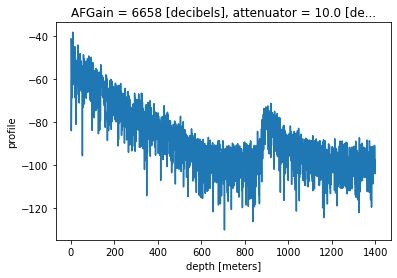

In [14]:
def load_xapres(site):
    filename = f'gs://ldeo-glaciology/apres/greenland/2022/single_zarrs_noencode/{site}'
    ds = xr.open_dataset(filename,
        engine='zarr', 
        chunks={}) 
    # add db function as new bound method of DataArrays
    xr.DataArray.db = lambda self : 20*np.log10(np.abs(self))
    return ds

ds = load_xapres('A104')
ds.profile.isel(time=300, chirp_num=0, attenuator_setting_pair=0).db().plot()

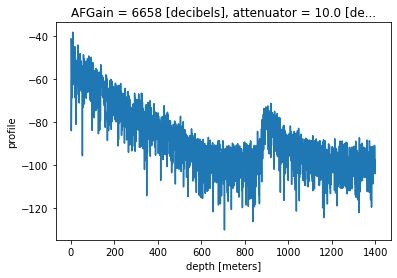

In [40]:
ds.profile.isel(time=300, chirp_num=0, attenuator_setting_pair=0).mean().compute()

<xarray.DataArray 'profile' ()>
array(6.59450848e-07+7.89341126e-07j)
Coordinates:
    AFGain        int64 1
    attenuator    float64 10.0
    burst_number  int64 65
    chirp_num     int64 0
    filename      <U83 'ldeo-glaciology/GL_apres_2022/A104/CardA/DIR2022-05-2...
    time          datetime64[ns] 2022-05-29T09:03:29

In [38]:
ds.MyMean()

running my mean function


<xarray.DataArray 'profile' ()>
dask.array<mean_agg-aggregate, shape=(), dtype=complex128, chunksize=(), chunktype=numpy.ndarray>
Coordinates:
    AFGain        int64 dask.array<chunksize=(), meta=np.ndarray>
    attenuator    float64 dask.array<chunksize=(), meta=np.ndarray>
    burst_number  int64 dask.array<chunksize=(), meta=np.ndarray>
    chirp_num     int64 0
    filename      <U83 dask.array<chunksize=(), meta=np.ndarray>
    time          datetime64[ns] 2022-05-29T09:03:29

TypeError: Plotting requires coordinates to be numeric, boolean, or dates of type numpy.datetime64, datetime.datetime, cftime.datetime or pandas.Interval. Received data of type complex128 instead.

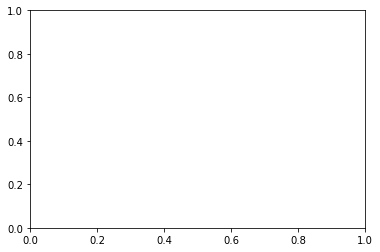

In [9]:
ds.profile.isel(time=300, chirp_num=0, attenuator_setting_pair=0)

In [12]:
class A:
     def bar( self ):
        print("bar")

In [13]:
A()

In [14]:
a = A()

In [16]:
a.bar()

bar


In [22]:
xr.Dataset.MyMean = MyMean


In [24]:
da = xr.Dataset()
da.MyMean

<bound method MyMean of <xarray.Dataset>
Dimensions:  ()
Data variables:
    *empty*>

In [27]:
ds.MyMean()

<xarray.Dataset>
Dimensions:          ()
Data variables:
    battery_voltage  float64 dask.array<chunksize=(), meta=np.ndarray>
    chirp            float64 dask.array<chunksize=(), meta=np.ndarray>
    latitude         float64 dask.array<chunksize=(), meta=np.ndarray>
    longitude        float64 dask.array<chunksize=(), meta=np.ndarray>
    profile          complex128 dask.array<chunksize=(), meta=np.ndarray>
    profile_stacked  complex128 dask.array<chunksize=(), meta=np.ndarray>
    temperature_1    float64 dask.array<chunksize=(), meta=np.ndarray>
    temperature_2    float64 dask.array<chunksize=(), meta=np.ndarray>